# <div style="text-align: center"> Introduction to Python

## <div style="text-align: center">Introduction to Python (III)

In [ ]:
pip install -r requirements.txt

# Data Visualization

## Matplotlib

Matplotlib is a popular Python library used for creating high-quality visualizations such as line plots, scatter plots, bar charts, histograms, and many more. It provides an easy-to-use interface for creating customizable plots and graphs that can be embedded into Python scripts, web applications, and interactive notebooks. Matplotlib is built on NumPy arrays and is compatible with other popular Python libraries such as Pandas, Seaborn, and SciPy. It is widely used in scientific computing, data analysis, and machine learning applications to help users gain insights from complex data.

## Seaborn

Seaborn is a Python data visualization library that is built on top of Matplotlib. It provides a high-level interface for creating informative and attractive statistical graphics. Seaborn simplifies the creation of complex visualizations by offering several built-in themes, color palettes, and statistical functions. 

With Seaborn, you can create a wide range of visualizations including scatterplots, line plots, bar plots, histograms, heatmaps, and more. Seaborn is often used in conjunction with Pandas, a popular data manipulation library, and is widely used in data analysis, machine learning, and scientific research.

## Titanic
We will use the `titanic` dataset, which statistically (and mercilessly) describes the sad fate of passengers of a well-known passenger ship. This dataset is available in many places, but we will use the copy provided with the `seaborn` package. We need to load this package first:

In [2]:
import seaborn as sns
import ssl 
import matplotlib.pyplot as plt

# https://stackoverflow.com/questions/57483667/ssl-certificate-verify-failed-error-when-loading-data-into-seaborn
ssl._create_default_https_context = ssl._create_unverified_context

print("seaborn version:\n", sns.__version__)

seaborn version:
 0.12.2


In [3]:
dataset_names = sns.get_dataset_names()

dataset_names

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
# we see that there are some datasets available - we are loading dataset titanic:
titanic = sns.load_dataset('titanic')

In [5]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [7]:
titanic['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [8]:
titanic.who.unique()

array(['man', 'woman', 'child'], dtype=object)

In [9]:
titanic.shape

(891, 15)

Dataframe also lets you extract basic information from the data it contains. For example, we'll draw a boxplot showing the passenger age (`age`) broken down into ticket classes (`class`):

<Axes: title={'center': 'age'}, xlabel='class'>

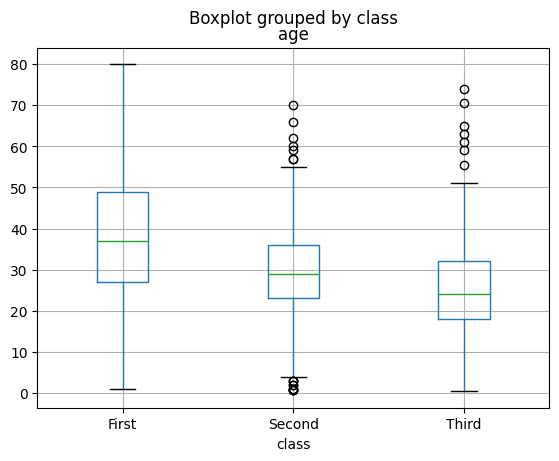

In [10]:
titanic.boxplot('age', by='class')

Now show the passenger age (`sex`) broken down into ticket classes (`class`):

<Axes: title={'center': 'age'}, xlabel='sex'>

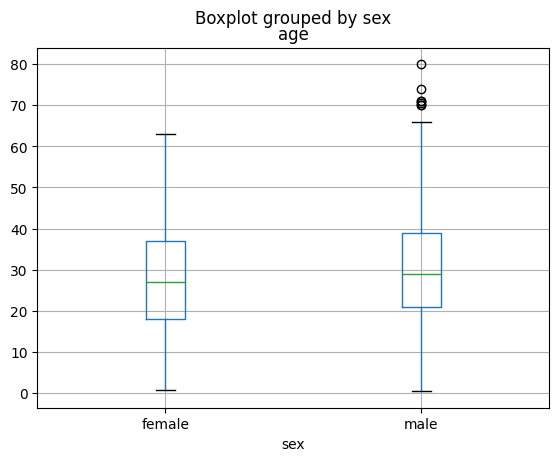

In [11]:
titanic.boxplot('age', by='sex')

#### <span style="color:red">**TASK**</span>

Please write a code that would present a distribution of age - sorted (from the lowest to the highest) - of people in this database. In order to do that, you need to use the `.sort_values()` and `value_counts()` methods. Use the `.plot()` method to plot the graph :)

<Axes: >

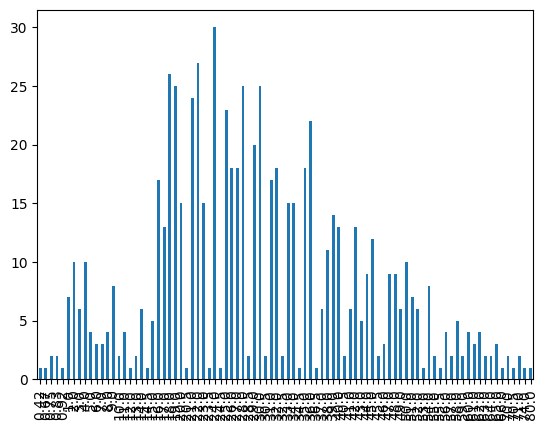

In [12]:
# Code goes here
sorted_ages = titanic['age'].sort_values()
sorted_ages.value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='fare', ylabel='Count'>

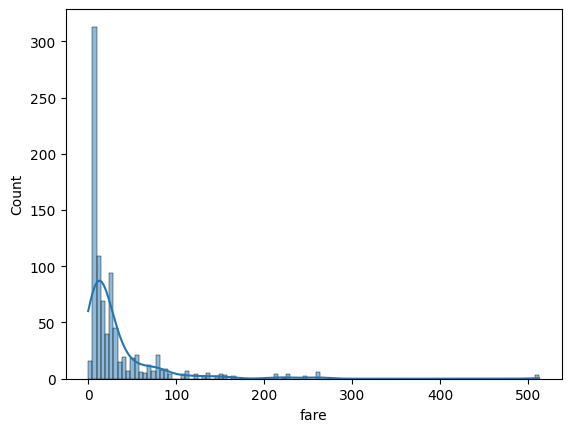

In [13]:
sns.histplot(titanic.fare, kde=True)

Before proceeding further, think about the following:
* Do you understand what the boxplot chart shows? What is the line in the middle of the box, which part of the data is represented by the box and which represented the "whiskers"?
* What do we learn from the above charts?
* Do we see any relationship between the age and class in which the person travelled?

<Axes: xlabel='class', ylabel='age'>

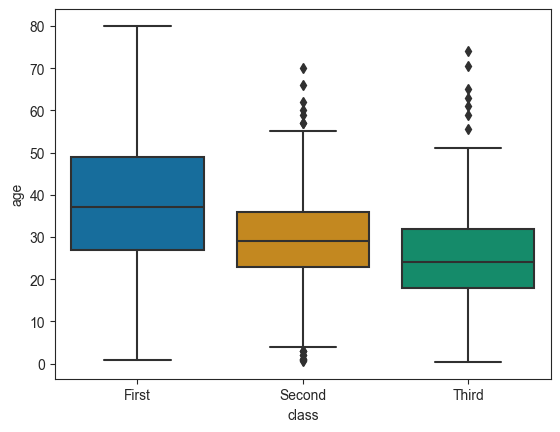

In [14]:
sns.set_style('ticks', )
sns.set_palette('colorblind')
sns.boxplot(x='class', y='age', data=titanic)

Reset the styles to the default ones:

In [15]:
sns.set(style="ticks")

Set palette to `Paired`:

In [16]:
sns.color_palette("Paired")

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

<Axes: xlabel='class', ylabel='age'>

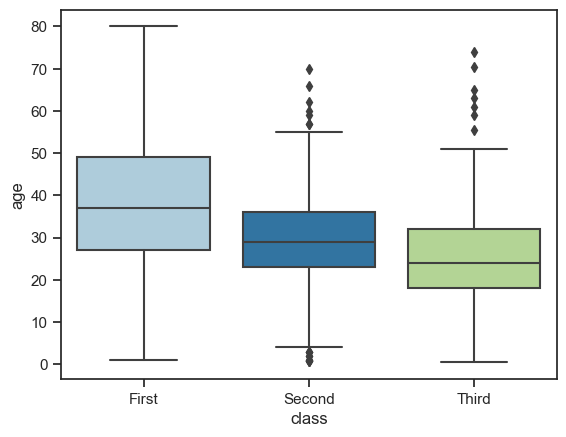

In [17]:
sns.set_palette(sns.color_palette("Paired"))
sns.boxplot(x='class', y='age', data=titanic)

## Quick recap how to access data in a dataframe

Using the `.loc[]` method, we can select columns and rows of interest to us:

In [18]:
titanic.loc[:6, 'sex':'class']

,sex,age,sibsp,parch,fare,embarked,class
0,male,22.0,1,0,7.2500,S,Third
1,female,38.0,1,0,71.2833,C,First
2,female,26.0,0,0,7.9250,S,Third
3,female,35.0,1,0,53.1000,S,First
4,male,35.0,0,0,8.0500,S,Third
5,male,NaN,0,0,8.4583,Q,Third
6,male,54.0,0,0,51.8625,S,First


#### <span style="color:red">**TASK**</span>

Below, in a similar way, select rows 10 to 18 from the dataframe and columns from `'fare'` to `'deck'`:


In [19]:
# Code goes here

In [20]:
titanic.loc[111:113]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
111,0,3,female,14.5,1,0,14.4542,C,Third,child,False,NaN,Cherbourg,no,False
112,0,3,male,22.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
113,0,3,female,20.0,1,0,9.8250,S,Third,woman,False,NaN,Southampton,no,False


In [21]:
titanic.loc[111:113, 'who':]

,who,adult_male,deck,embark_town,alive,alone
111,child,False,NaN,Cherbourg,no,False
112,man,True,NaN,Southampton,no,True
113,woman,False,NaN,Southampton,no,False


In [22]:
titanic.age[0]

22.0

#### <span style="color:red">**TASK**</span>

Using titanic dataset display the average survival rate.

**Answer:** _0.383838_

In [23]:
# Code goes here
titanic['survived'].mean()

0.3838383838383838

#### <span style="color:red">**TASK**</span>

Before we do in-depth analysis, let's check if there are any missing values in the dataset. Use the `.isnull()` method to check if there are any missing values in the dataset. If there are any, use the `.sum()` method to count them.


In [24]:
# Code goes here
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [25]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [26]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

We are missing 177 values in the `age` column and 688 values in the `deck` column. We will deal with missing values in the next section.

#### <span style="color:red">**TASK**</span>

Let's first find a few more things about the dataset and practice pandas methods:
1. What was the average age of passengers?
2. What was the average age of passengers who survived?
3. What was the average age of passengers who did not survive?
4. Check using the `unique()` method to learn unique (non-duplicate) values on `who` column.
5. Draw the histogram of the `fare` column.
6. Draw the histogram of the `fare` column using the `bins` parameter as in previous task but add the `bins` parameter with value 20.
7. The percentage of passangers above 30 years old.
   

In [27]:
titanic.new_column = 1

In [28]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [29]:
titanic[titanic['survived']==1]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


average: 29.69911764705882
survived passengers average: 28.343689655172415
not survived passengers average: 28.343689655172415
Unique 'who' values: ['man' 'woman' 'child']


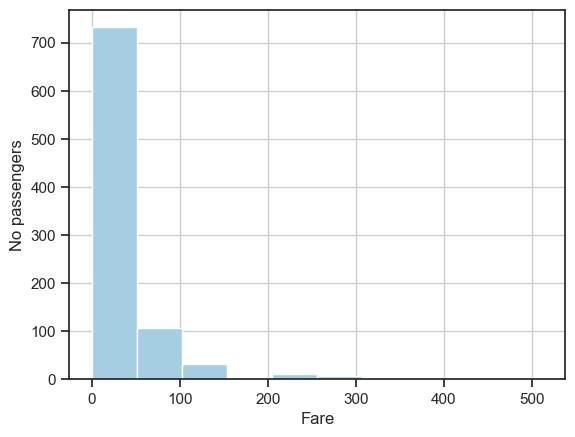

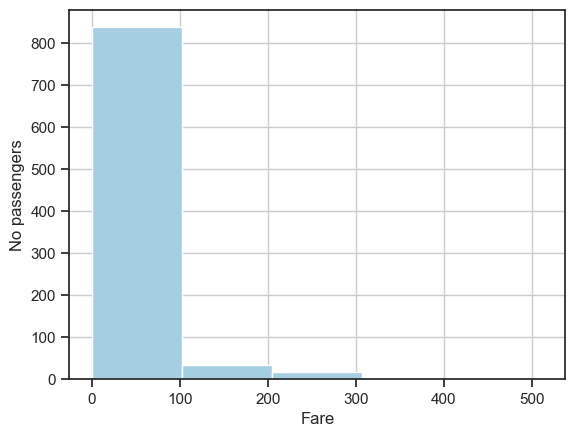

Passengers above 30: 34.231200897867566


In [30]:
# 1
average = titanic['age'].mean()
print(f'average: {average}')

# 2
surv_avg_age = titanic[titanic['survived']==1]['age'].mean()
print(f'survived passengers average: {surv_avg_age}')

# 3
not_surv_avg_age = titanic[titanic['survived']==0]['age'].mean()
print(f'not survived passengers average: {surv_avg_age}')

# 4
u_who = titanic['who'].unique()
print(f"Unique 'who' values: {u_who}")

# 5
titanic['fare'].hist()
plt.xlabel('Fare')
plt.ylabel('No passengers')
plt.show()

# 6
titanic['fare'].hist(bins=5)
plt.xlabel('Fare')
plt.ylabel('No passengers')
plt.show()

# 7
above_30 = titanic[titanic['age'] > 30]
above_30 = len(above_30) / len(titanic) * 100
print(f"Passengers above 30: {above_30}")


In [31]:
# Code goes here

We are interested in how many people survived depending on the class, but first let's see how many passengers traveled in each class. We will use the `countplot` function of the` seaborn` package for this:

[Text(0, 0, '216'), Text(0, 0, '184'), Text(0, 0, '491')]

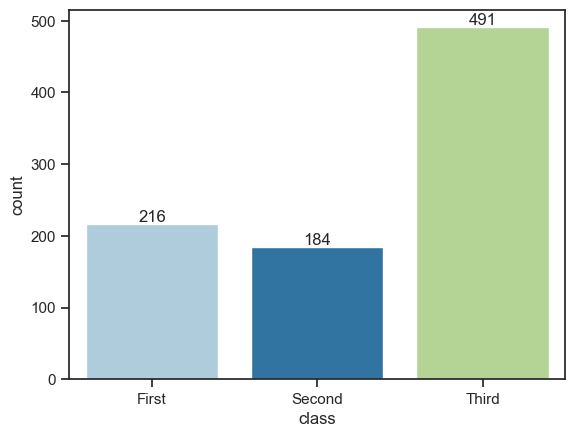

In [32]:
ax = sns.countplot(x='class', data=titanic)
ax.bar_label(ax.containers[0])

We see that most people traveled in third class. Now let's see how many people survived (the `survived` column) in each class (the` class` column). We will use the same function as above, but this time the first argument will be the name of the column describing survival. In addition, we will use the argument `hue` and give it the name of the column broken down into which we want to see on the chart (we want to see the survival broken down into classes). As a result, on one side of the chart we will have survivors, and on the other those who died, and each of these categories will be divided into colored bars representing the class.

<Axes: xlabel='class', ylabel='count'>

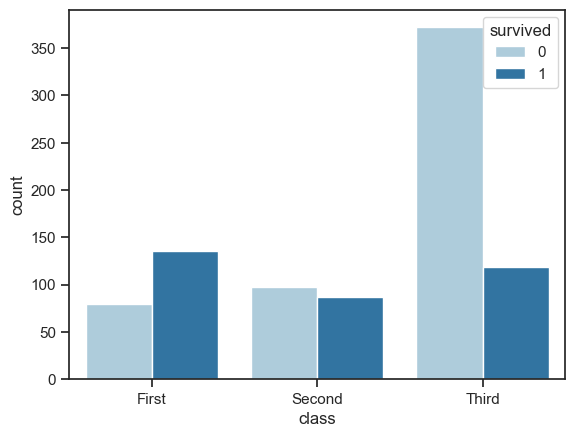

In [33]:
sns.countplot(x='class', hue='survived', data=titanic)

<Axes: xlabel='class', ylabel='count'>

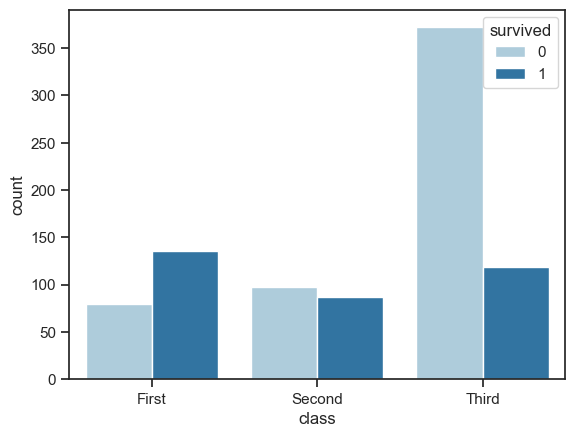

In [34]:
sns.countplot(x='class', hue='survived', data=titanic)

#### <span style="color:red">**TASK**</span>

Create a new column called `alive_in_first_class` that contains the values `yes` or `no` depending on whether the passenger survived or not. Use the `.map()` method to do that.

In [35]:
# Code goes here

first_class = titanic['pclass'] == 1
survived = titanic['survived'] == 1
titanic['alive_in_first_class'] = (first_class & survived).map({True: 'yes', False: 'no'})

In [36]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,alive_in_first_class
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,no
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,yes
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,no
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,yes
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,no
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,yes
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,no
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,yes


In [37]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,alive_in_first_class
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,no
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,yes
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,no
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,yes
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,no
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,yes
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,no
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,yes


## Weed Price Dataset
### Read the input datasets. There are three datasets:

1. Weed price by date / state (We would be using Marijuana prices in various states of the USA, along with demographic data of the USA based on the latest census data)
2. Demographics of State

In [38]:
import pandas as pd

In [39]:
prices_df = pd.read_csv(r"data/weed_price.csv", parse_dates=[-1])
demography_df = pd.read_csv(r"data/demographics_state.csv")

In [40]:
prices_df

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date
0,Alabama,339.06,1042,198.64,933,149.49,123,2014-01-01
1,Alaska,288.75,252,260.60,297,388.58,26,2014-01-01
2,Arizona,303.31,1941,209.35,1625,189.45,222,2014-01-01
3,Arkansas,361.85,576,185.62,544,125.87,112,2014-01-01
4,California,248.78,12096,193.56,12812,192.92,778,2014-01-01
...,...,...,...,...,...,...,...,...
22894,Virginia,364.98,3513,293.12,3079,NaN,284,2014-12-31
22895,Washington,233.05,3337,189.92,3562,NaN,160,2014-12-31
22896,West Virginia,359.35,551,224.03,545,NaN,60,2014-12-31
22897,Wisconsin,350.52,2244,272.71,2221,NaN,167,2014-12-31


In [41]:
demography_df

,region,total_population,percent_white,percent_black,percent_asian,percent_hispanic,per_capita_income,median_rent,median_age
0,alabama,4799277,67,26,1,4,23680,501,38.1
1,alaska,720316,63,3,5,6,32651,978,33.6
2,arizona,6479703,57,4,3,30,25358,747,36.3
3,arkansas,2933369,74,15,1,7,22170,480,37.5
4,california,37659181,40,6,13,38,29527,1119,35.4
5,colorado,5119329,70,4,3,21,31109,825,36.1
6,connecticut,3583561,70,9,4,14,37892,880,40.2
7,delaware,908446,65,21,3,8,29819,828,38.9
8,district of columbia,619371,35,49,3,10,45290,1154,33.8
9,florida,19091156,57,15,2,23,26236,838,41.0


#### <span style="color:red">**TASK**</span>

Plot a bar chart showing population of each state in the USA.
- Sort the states by population in descending order.
- Use the `plt.xticks()` method to rotate the x-axis labels by 90 degrees.
- Use the `plt.title()` method to add a title to the plot.

In [42]:
sorted_df = demography_df.sort_values(by='total_population', ascending=False)

plt.figure(figsize=(20, 10))

plt.bar(x=sorted_df['region'], sorted_df['total_population'])
 
plt.xticks(rotation=90)
 
plt.title('Population of Each State in the USA')
 
plt.show()

SyntaxError: positional argument follows keyword argument (2730170220.py, line 5)

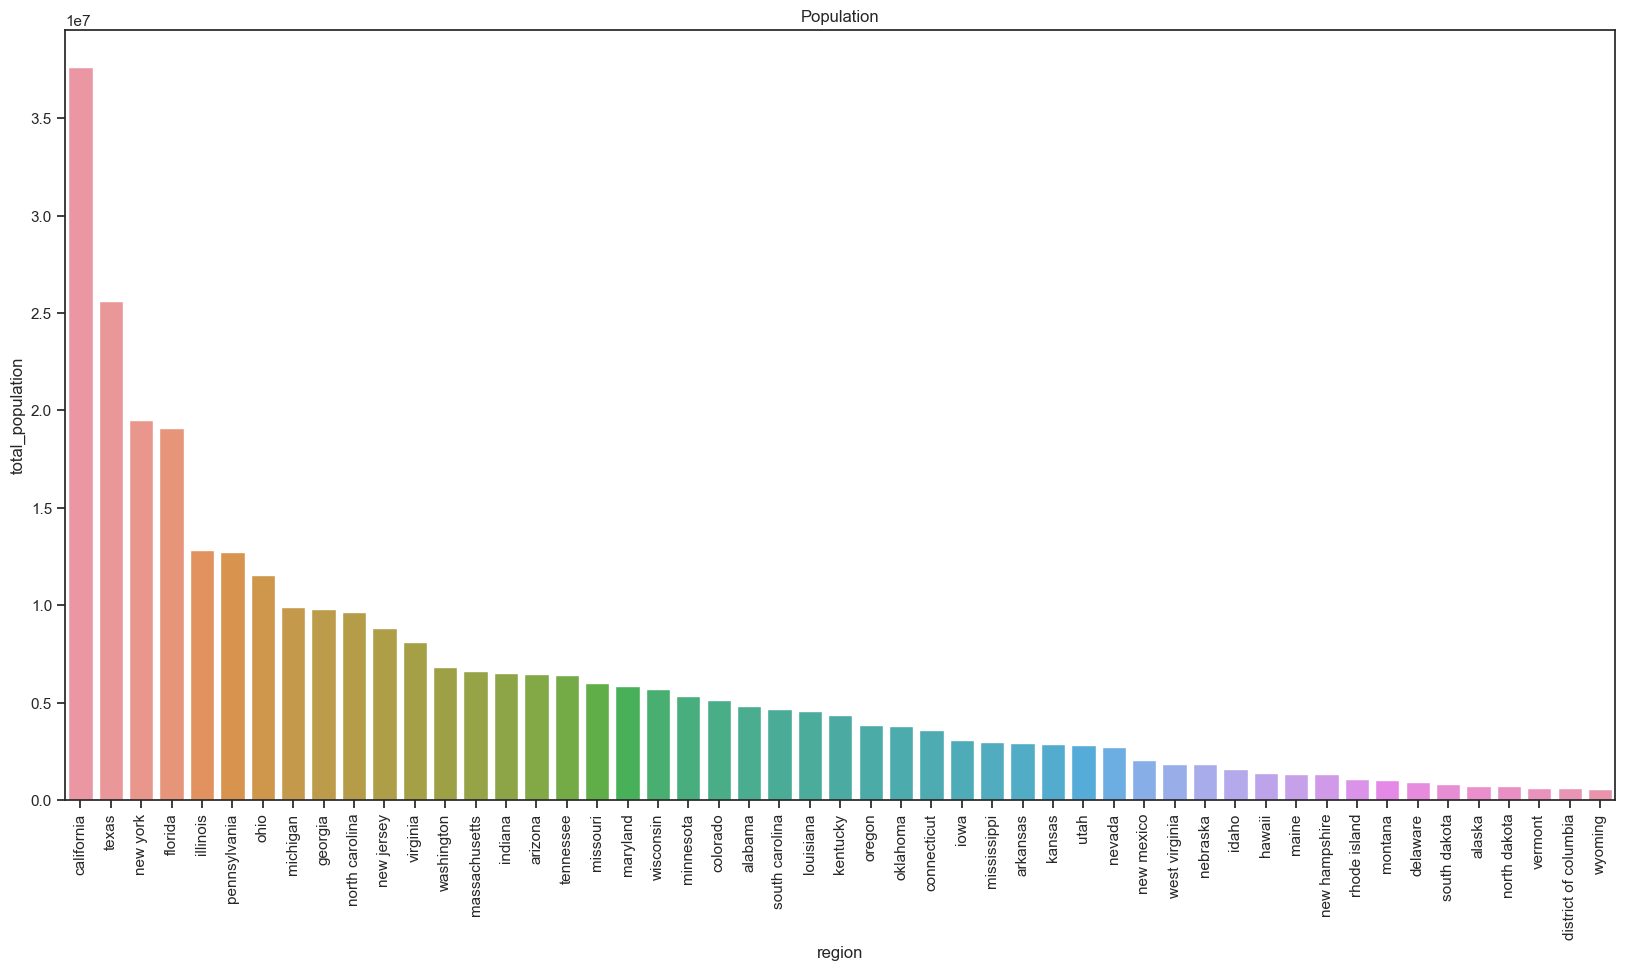

In [43]:
sorted = demography_df.sort_values(by="total_population", ascending=False)
 
plt.figure(figsize=(20, 10))
ax = sns.barplot(x='region', y='total_population', data=sorted)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Population")
plt.show()

In [44]:
# Code goes here

#### <span style="color:red">**TASK**</span>

Plot a line chart showing the High-Quality Price in the state of California.

<Axes: xlabel='date'>

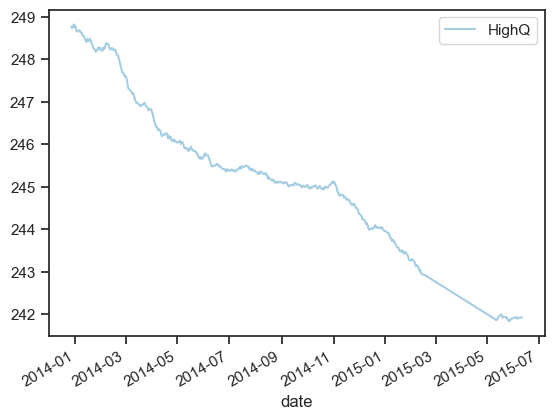

In [45]:
prices_df[prices_df['State'] == "California"].plot(x='date', y='HighQ')

<Axes: xlabel='date'>

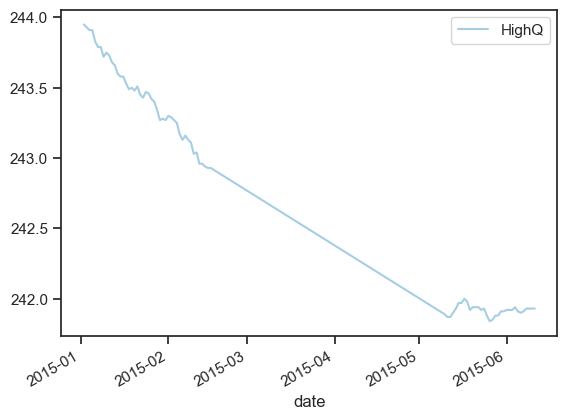

In [46]:
prices_df[(prices_df['State']== "California") & (prices_df['date'] > '2015-01-01') & (prices_df['date'] < '2015-12-31')].plot(x='date', y='HighQ')

<Axes: xlabel='date', ylabel='HighQ'>

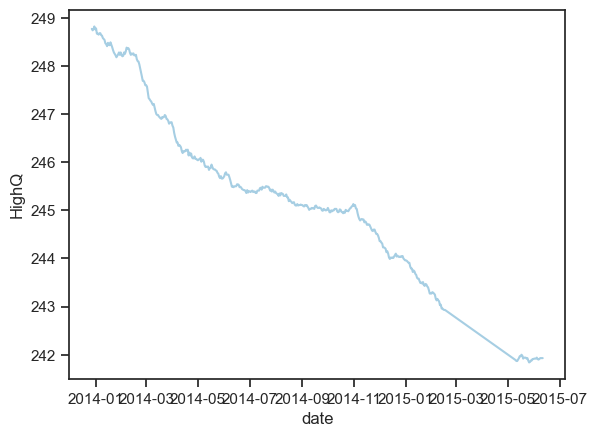

In [47]:
sns.lineplot(x='date', y='HighQ', data=prices_df[prices_df['State']== "California"])

#### <span style="color:red">**TASK**</span>

Filter the data to show only the data for the year 2014 for Oregon state and find mean, median, mode, and standard deviation of the High-Quality, Medium-Quality, and Low-Quality prices.

*Hint:* check what this code is doing: `prices_df.iloc[0]['date'].year`

In [48]:
prices_df.loc[0, 'date'].year

2014

In [54]:
#1
oregon_df = prices_df[(prices_df['State'] == 'Oregon') & (prices_df.date.dt.year == 2014)]
mean_HighQ = oregon_df['HighQ'].mean()
print(mean_HighQ)
 
#2
median_HighQ = oregon_df['HighQ'].median()
print(median_HighQ)
 
#3
mode_HighQ = oregon_df['HighQ'].mode()
print(mode_HighQ)
 
#4
var_HighQ = oregon_df['HighQ'].var()
print(var_HighQ)
 
#5
std_HighQ = oregon_df['HighQ'].std()
print(std_HighQ)

209.36983516483517
208.945
0    208.15
1    208.87
2    209.59
3    210.47
4    211.58
Name: HighQ, dtype: float64
3.648135509944602
1.9100092957743955


#### <span style="color:red">**TASK**</span>

1. Calculate the mean `HighQ` for Oregon.
2. Calculate the median `HighQ` for Oregon. (Median is the middle value.)
3. Calculate the mode `HighQ` for Oregon. (Mode is the most common value.)
4. Calculate the variance `HighQ` for Oregon. (Variance is the average distance of each data point from the mean.)
5. Calculate the standard deviation `HighQ` for Oregon. ( Standard deviation is the square root of the variance.)

In [167]:
# Code goes here

### Pandas built-in descriptive statistics

Pandas dataframes have a built-in method for calculating descriptive statistics. Let's use it to calculate the mean, median, mode, variance, and standard deviation. We will use the `describe()` method:

In [57]:
prices_df.describe()

,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
count,22899.000000,22899.000000,22899.000000,22899.000000,12342.000000,22899.000000
mean,329.759854,2274.743657,247.618306,2183.737805,203.747847,202.804489
std,41.173167,2641.936586,44.276015,2789.902626,105.480774,220.531987
min,202.020000,93.000000,144.850000,134.000000,63.700000,11.000000
25%,303.780000,597.000000,215.775000,548.000000,147.117500,51.000000
50%,342.310000,1420.000000,245.800000,1320.000000,186.760000,139.000000
75%,356.550000,2958.000000,274.155000,2673.000000,221.360000,263.000000
max,415.700000,18492.000000,379.000000,22027.000000,734.650000,1287.000000


### Covariance and correlation

Covariance is a measure of how two variables change together. A positive covariance means that when one variable increases, the other also increases. A negative covariance means that when one variable increases, the other decreases.

Pandas has a built-in method for calculating covariance. Let's compare covariance for the `HighQ` prices in California and New York. Create a new dataframe with only the `HighQ`  prices and `date` for California and New York. Create columns `CA_HighQ` and `NY_HighQ`:

In [65]:
ca_ny_prices_df = prices_df.pivot(index='date', columns='State', values='HighQ')[['California', 'New York']]
ca_ny_prices_df.columns = ['CA_HighQ', 'NY_HighQ']
ca_ny_prices_df.reset_index(inplace=True)

In [64]:
prices_df.pivot(index='date', columns='State', values='HighQ')[['California', 'New York']]

State,California,New York
date,,
2013-12-27,248.77,351.98
2013-12-28,248.74,351.92
2013-12-29,248.76,351.99
2013-12-30,248.82,352.02
2013-12-31,248.76,351.97
...,...,...
2015-06-07,241.91,338.27
2015-06-08,241.93,338.26
2015-06-09,241.93,338.27


In [66]:
ca_ny_prices_df

,date,CA_HighQ,NY_HighQ
0,2013-12-27,248.77,351.98
1,2013-12-28,248.74,351.92
2,2013-12-29,248.76,351.99
3,2013-12-30,248.82,352.02
4,2013-12-31,248.76,351.97
...,...,...,...
444,2015-06-07,241.91,338.27
445,2015-06-08,241.93,338.26
446,2015-06-09,241.93,338.27
447,2015-06-10,241.93,338.40


In [67]:
ca_ny_prices_df[['CA_HighQ', 'NY_HighQ']].cov()

,CA_HighQ,NY_HighQ
CA_HighQ,2.982686,5.916815
NY_HighQ,5.916815,12.245147


<Axes: xlabel='date'>

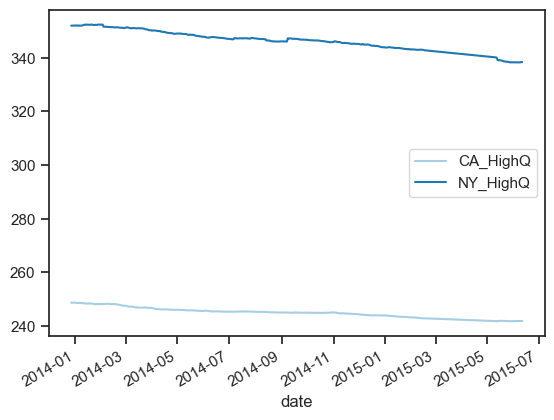

In [68]:
ca_ny_prices_df.plot(x='date', y=['CA_HighQ', 'NY_HighQ'])

Correlation is a measure of how two variables are related. It is a normalized version of covariance. It is a number between -1 and 1. A value of 1 means that there is a perfect positive correlation. A value of -1 means that there is a perfect negative correlation. A value of 0 means that there is no correlation. Let's calculate the correlation between the `HighQ` prices in California and New York:

In [69]:
ca_ny_prices_df[['CA_HighQ', 'NY_HighQ']].corr()

,CA_HighQ,NY_HighQ
CA_HighQ,1.000000,0.979044
NY_HighQ,0.979044,1.000000


In [70]:
cols = ['California', 'New York', 'Oregon', 'Alabama', 'Washington']
 
cols_prices = prices_df.pivot(index='date', columns='State', values='HighQ')[cols]

In [71]:
cols_prices.corr()

State,California,New York,Oregon,Alabama,Washington
State,,,,,
California,1.000000,0.979044,0.987644,0.608295,0.842088
New York,0.979044,1.000000,0.991464,0.654062,0.789509
Oregon,0.987644,0.991464,1.000000,0.659191,0.784216
Alabama,0.608295,0.654062,0.659191,1.000000,0.199878
Washington,0.842088,0.789509,0.784216,0.199878,1.000000


#### <span style="color:red">**TASK**</span>

Plot the correlation matrix for the `HighQ` prices in California, New York. Find the correct `sns` function to do that (https://seaborn.pydata.org/index.html).

<Axes: xlabel='State', ylabel='State'>

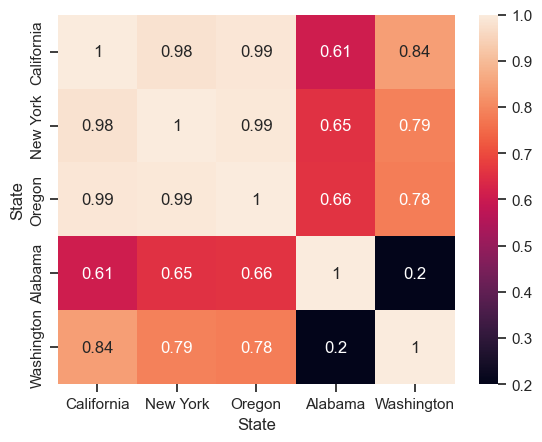

In [78]:
# Code goes here
cols = ['California', 'New York', 'Oregon', 'Alabama', 'Washington']
 
cols_prices = prices_df.pivot(index='date', columns='State', values='HighQ')[cols]

sns.heatmap(cols_prices.corr(), annot=True)

### Histograms

A histogram is a graphical representation of the distribution of numerical data. It is an estimate of the probability distribution of a continuous variable. The x-axis represents the values of the variable, and the y-axis represents the frequency of occurrence of each value. The height of the bars is proportional to the frequency of occurrence of the values.

#### Distribution

> A distribution is a function that gives the probabilities of occurrence of different possible outcomes in an experiment.


Let's plot distribution of weed prices for 2015

<Axes: xlabel='HighQ', ylabel='Count'>

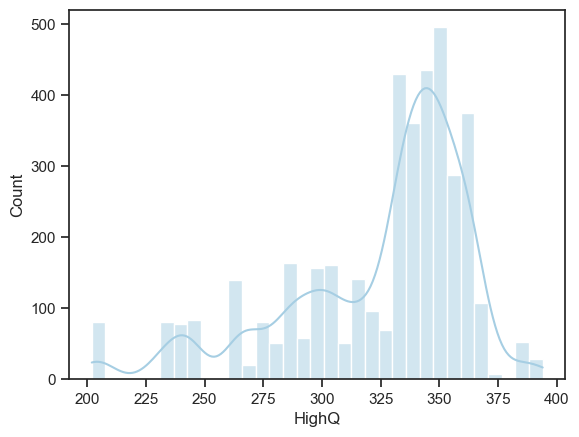

In [79]:
prices_df_2015 = prices_df[prices_df.date.dt.year == 2015]
sns.histplot(prices_df_2015.HighQ, kde=True)

We can see that the distribution is skewed to the right. The mean is greater than the median. The distribution is positively skewed.

Let's count means for each state in January 2015:

In [80]:
prices_df.loc[(prices_df['date'].dt.month==1) & (prices_df['date'].dt.year==2015), ["State", "HighQ"]]

,State,HighQ
51,Alabama,337.54
52,Alaska,303.02
53,Arizona,298.51
54,Arkansas,341.68
55,California,243.96
...,...,...
22486,Virginia,364.53
22487,Washington,232.89
22488,West Virginia,358.24
22489,Wisconsin,348.75


In [81]:
weed_jan2015_summarized = prices_df.loc[(prices_df['date'].dt.month==1) & (prices_df['date'].dt.year==2015), ["State", "HighQ"]].groupby("State").mean().reset_index()

In [83]:
weed_jan2015_summarized.head().sort_values(by="HighQ", ascending=False)

,State,HighQ
3,Arkansas,341.705806
0,Alabama,336.504839
1,Alaska,302.972581
2,Arizona,297.782903
4,California,243.602258


<Axes: xlabel='HighQ', ylabel='Count'>

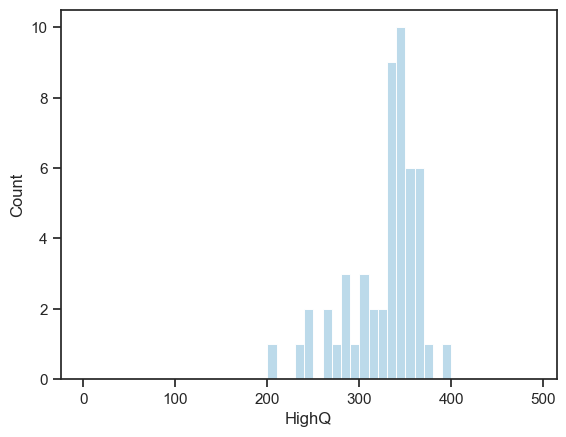

In [86]:
sns.histplot(weed_jan2015_summarized.HighQ, bins=range(0,500,10))

If we put our finger randomly on a map of USA and point to a state, the highest probability is that Weed price in that state will be above 340$ per ounce.

### Lambda functions

Lambda functions are small anonymous functions. A lambda function can take any number of arguments, but can only have one expression. Lambda functions are used together with built-in functions like `filter()`, `map()`, and `reduce()` and `apply()`. Examples:

In [ ]:
def get_month(row):
  return row.dt.month

In [90]:
prices_df.date.map(lambda date: f'{date.day}/{date.month}/{date.year}')

0          1/1/2014
1          1/1/2014
2          1/1/2014
3          1/1/2014
4          1/1/2014
            ...    
22894    31/12/2014
22895    31/12/2014
22896    31/12/2014
22897    31/12/2014
22898    31/12/2014
Name: date, Length: 22899, dtype: object

In [91]:
prices_df['month'] = prices_df.date.map(lambda x: x.month)
prices_df['year'] = prices_df.date.apply(lambda x: x.year)
prices_df['high_med_diff'] = prices_df.apply(lambda x: x.HighQ - x.MedQ, axis=1)

In [92]:
prices_df

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date,month,year,high_med_diff
0,Alabama,339.06,1042,198.64,933,149.49,123,2014-01-01,1,2014,140.42
1,Alaska,288.75,252,260.60,297,388.58,26,2014-01-01,1,2014,28.15
2,Arizona,303.31,1941,209.35,1625,189.45,222,2014-01-01,1,2014,93.96
3,Arkansas,361.85,576,185.62,544,125.87,112,2014-01-01,1,2014,176.23
4,California,248.78,12096,193.56,12812,192.92,778,2014-01-01,1,2014,55.22
...,...,...,...,...,...,...,...,...,...,...,...
22894,Virginia,364.98,3513,293.12,3079,NaN,284,2014-12-31,12,2014,71.86
22895,Washington,233.05,3337,189.92,3562,NaN,160,2014-12-31,12,2014,43.13
22896,West Virginia,359.35,551,224.03,545,NaN,60,2014-12-31,12,2014,135.32
22897,Wisconsin,350.52,2244,272.71,2221,NaN,167,2014-12-31,12,2014,77.81


#### <span style="color:red">**TASK**</span>

Using lambda functions, create new column called `HighQ_2015` that contains the values `yes` or `no` depending on whether the price in January 2015 was above or below 340$ per ounce.

In [ ]:
# Code goes here

prices_df["HighQ_2015"] = prices_df.apply(lambda row: 'yes' if (row.date.year == 2015) &   )

In [93]:
prices_df['HighQ_2015'] = prices_df.apply(lambda row: 'yes' if row['HighQ'] > 340 else 'no', axis=1)
prices_df.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date,month,year,high_med_diff,HighQ_2015
0,Alabama,339.06,1042,198.64,933,149.49,123,2014-01-01,1,2014,140.42,no
1,Alaska,288.75,252,260.60,297,388.58,26,2014-01-01,1,2014,28.15,no
2,Arizona,303.31,1941,209.35,1625,189.45,222,2014-01-01,1,2014,93.96,no
3,Arkansas,361.85,576,185.62,544,125.87,112,2014-01-01,1,2014,176.23,yes
4,California,248.78,12096,193.56,12812,192.92,778,2014-01-01,1,2014,55.22,no
